# Purpose: Do a logistic plus fit to carbon emissions from fossil fuel use and cement production changes from 1751-2017, using data from sources described at the end of this notebook .

Set the working directory and import necessary libraries

In [1]:
%reset -f
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17CO2')

Read input files and assign the year values and carbon emission data 

In [2]:
df = pd.read_excel('heat17emtic.1751-2017dec11.xlsx')
df.to_csv('heat18emtic.1751-2017dec11.csv',header=False,index=False)
df1 = pd.read_csv('heat18emtic.1751-2017dec11.csv')
df2 = df1.iloc[:-1]
yrs = df2.iloc[:,0:1]
emitc = df2.iloc[:,1:2]
emitc = emitc['MtonneC/yr'].tolist()
emitc = list(map(float, emitc))
newemitc = [x / 1000 for x in emitc]
emitc = list(map(str, newemitc))
emitc = pd.DataFrame({'GtonneC':emitc})
df = pd.merge(yrs, emitc, left_index =True, right_index =True,how='outer')
df = df.astype(float)
yrs = yrs['Year'].tolist()
yrs = list(map(int, yrs))
# print(yrs)

Define the fitted logistic function and fit data.

The emissions estimates are for fossil fuel burning, cement production, and natural gas flaring from 1751--2014 (Boden, Andres, and Marlande 2017), with 0.4%/yr increases in 2015 and 2016 and a  2% increase from 2016 to 2017 (Jackson et al. 2017). The complete data from Boden et al. is in file http-//cdiac.ess-dive.lbl.gov/ftp/ndp030/global.1751_2014.ems.docx. Then all but the global totals was deleted and entries for 2015, 2016, and 2017 added per the increases estimated by Jackson et al. in an article received by the journal on 18 October 2017. References are:
Boden, T.,  B. Andres, and G. Marlande.  2017. Global CO2 emissions from fossil-fuel burning, cement manufacture, and gas flaring: 1751-2014, U.S. Department of Energy Carbon Dioxide  Information Analysis Center, http://cdiac.ess-dive.lbl.gov/ftp/ndp030/global.1751_2014.ems, accessed 11 December 2017.
Jackson, R., C. Le Qu\'er\'e, R. Andrew, J. Canadell, G. Peters, J. Roy, and L. Wu. 2017. Warning signs for stabilizing global CO$_2$ emissions, Environmental Research Letters 12, 1100202, https://doi.org/10.1088/1748-9326/aa9662, accessed 11 December 2017. 

In [3]:
def logistic(yrs, b1, b2, b3):
     y = b1 / (1 + np.exp(-(yrs-b2)/b3))
     return y
param_bounds=([10,2000,25],[20,2100,35])
emitc = emitc['GtonneC'].tolist()
emitc = list(map(float, emitc))
popt, pcov = curve_fit(logistic, yrs, emitc, bounds=param_bounds)
print (popt)

[  18.25200828 2011.1841084    29.30452822]


Make the plots, and compare the fitted plot with historical data

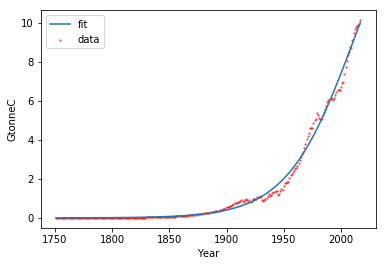

In [4]:
x = np.array(yrs)
y = logistic(x, *popt)
df.plot.scatter(x='Year',y='GtonneC',s=2,color = 'r', alpha = 0.5,label ='data',marker='o')
plt.plot(yrs,y, label='fit')
plt.xlabel('Year')
plt.ylabel('GtonneC')
plt.legend(loc='best')
plt.savefig('co22.eps',dpi=1000)
plt.show()
# Save the results
b1b2b3param = pd.DataFrame({'Name':['b1','b2','b3'],'Values':popt,'Units':['Year','Julian Year','1/Year'],'Meaning':['Saturation value','Inflection time','Initial growth rate']}, columns=["Name", "Values", "Units", "Meaning"])
b1b2b3param.to_csv('CAGE_CO2industry_Parameters.csv', index=False)